In [4]:
import lop.slowly_changing_regression.hoi_measures.datatools as datatools

In [5]:
datatensor = datatools.data_dir_to_tensor("lop/slowly_changing_regression/data/sgd/bp/relu/0")

In [6]:
datalist = [datatensor[i, :, :] for i in range(datatensor.shape[0])]

In [7]:
datalist[0].shape

torch.Size([100, 110])

In [35]:
import pandas as pd
import seaborn as sns

sns.pairplot(pd.DataFrame(datalist[10][:, 10:50].numpy()))

In [9]:
from thoi.measures.gaussian_copula import multi_order_measures, nplets_measures
from thoi.heuristics import simulated_annealing, greedy

<Axes: >

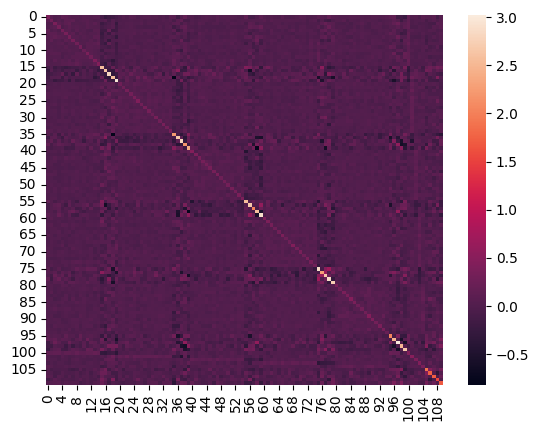

In [10]:
import numpy as np
sns.heatmap(np.cov(datalist[10][:, :].T.numpy()))

In [11]:
testmeasure = nplets_measures(datalist[19][:, :100], [range(100)])
testmeasure

tensor([[[nan, nan, nan, nan]]], dtype=torch.float64)

In [20]:
npletsids, scores = greedy(datalist[19][:, :], largest = False, metric = "o", batch_size=50_000)

In [21]:
scores_cpu = scores.cpu().numpy()

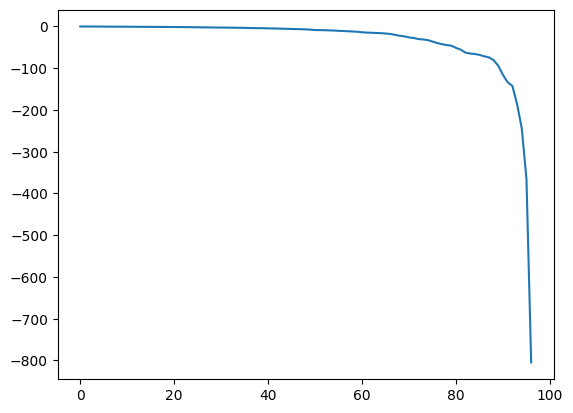

In [33]:
greedy_min = np.min(scores_cpu, axis=0)

import matplotlib.pyplot as plt

plt.plot(greedy_min)

# todo

- Matriz tiene cov 0 en algunas coords y tira NaN. Podríamos sacarlo nomás
- Quizas hay params que no se indeterminan por pertenecer al mismo grupo de parametros.
-
Si se vuelve mucho podemos estudiar los eigvals de la matriz de cov. Si hay uno muy grande nos habla de redundancia.